# Data cleaning

In [ ]:
# import
import pandas as pd
import numpy as np
import glob

In [3]:
# define a variable to select all the csv files in the Data folder
csv_files = glob.glob('/Users/endikamichelenabanuelos/Desktop/AAU/M6/Semester project/M6_sem_project/Data/*.csv')

# define a df
df = pd.DataFrame()

# loop through the files to create one big df
for file in csv_files:
    temp_df = pd.read_csv(file)
    df = pd.concat([df, temp_df], ignore_index=True)

In [4]:
# check the df
df

,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,BZN|DK1
0,01.01.2020 00:00 - 01.01.2020 01:00,33.42,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,30.85,EUR,NaN
...,...,...,...,...
26302,31.12.2022 19:00 - 31.12.2022 20:00,67.01,EUR,NaN
26303,31.12.2022 20:00 - 31.12.2022 21:00,40.50,EUR,NaN
26304,31.12.2022 21:00 - 31.12.2022 22:00,14.89,EUR,NaN
26305,31.12.2022 22:00 - 31.12.2022 23:00,9.94,EUR,NaN


In [5]:
# re-define the df only with the interesting features
df = df[['MTU (CET/CEST)','Day-ahead Price [EUR/MWh]']]

In [6]:
# re-nameing the features
df = df.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'Price'})

In [7]:
# check the data
df

,date,Price
0,01.01.2020 00:00 - 01.01.2020 01:00,33.42
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28
4,01.01.2020 04:00 - 01.01.2020 05:00,30.85
...,...,...
26302,31.12.2022 19:00 - 31.12.2022 20:00,67.01
26303,31.12.2022 20:00 - 31.12.2022 21:00,40.50
26304,31.12.2022 21:00 - 31.12.2022 22:00,14.89
26305,31.12.2022 22:00 - 31.12.2022 23:00,9.94


In [8]:

# modify the date column in order to have the start-date only
df['date'] = df['date'].apply(lambda x: x[0:16])

In [9]:
#check the data
df

,date,Price
0,01.01.2020 00:00,33.42
1,01.01.2020 01:00,31.77
2,01.01.2020 02:00,31.57
3,01.01.2020 03:00,31.28
4,01.01.2020 04:00,30.85
...,...,...
26302,31.12.2022 19:00,67.01
26303,31.12.2022 20:00,40.50
26304,31.12.2022 21:00,14.89
26305,31.12.2022 22:00,9.94


In [13]:
# check if there is any duplicated value
df['date'].duplicated().sum()

3

In [14]:
# drop duplicated values
df = df.drop_duplicates(subset='date')

In [15]:
# check the data
df

,date,Price
0,01.01.2020 00:00,33.42
1,01.01.2020 01:00,31.77
2,01.01.2020 02:00,31.57
3,01.01.2020 03:00,31.28
4,01.01.2020 04:00,30.85
...,...,...
26302,31.12.2022 19:00,67.01
26303,31.12.2022 20:00,40.50
26304,31.12.2022 21:00,14.89
26305,31.12.2022 22:00,9.94


In [16]:
# create the time_series variable for model building
time_series = TimeSeries.from_dataframe(df, time_col='date', value_cols = 'Price', fill_missing_dates=True, freq=None)

# Data visualization

In [17]:
# import
%matplotlib inline
import matplotlib.pyplot as plt

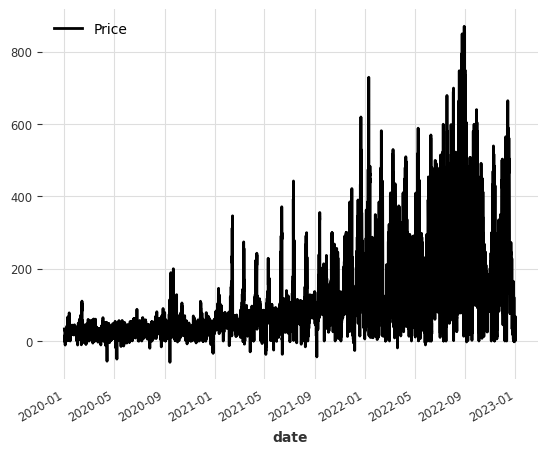

In [19]:
time_series.plot()

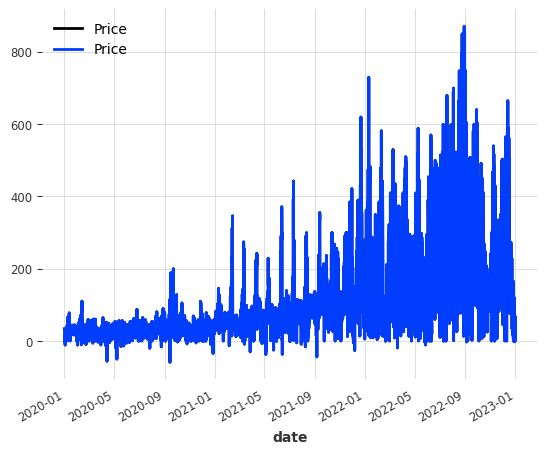

In [20]:
time_series1, time_series2 = time_series.split_before(0.75)
time_series.plot()
time_series.plot()

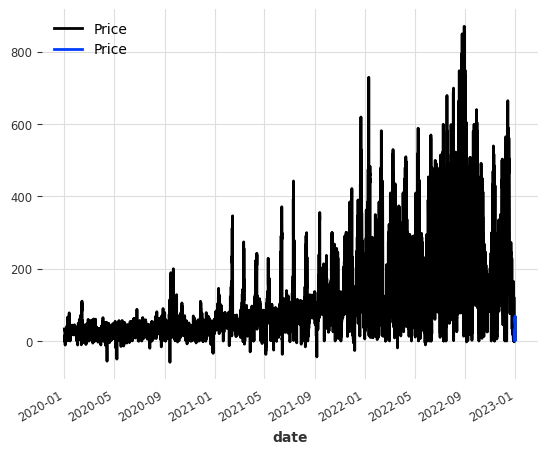

In [21]:
time_series1, time_series2 = time_series[:-36], time_series[-36:]
time_series1.plot()
time_series2.plot()

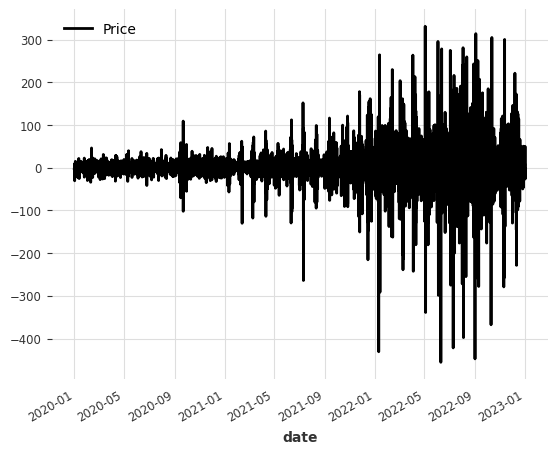

In [22]:
time_series.diff().plot()

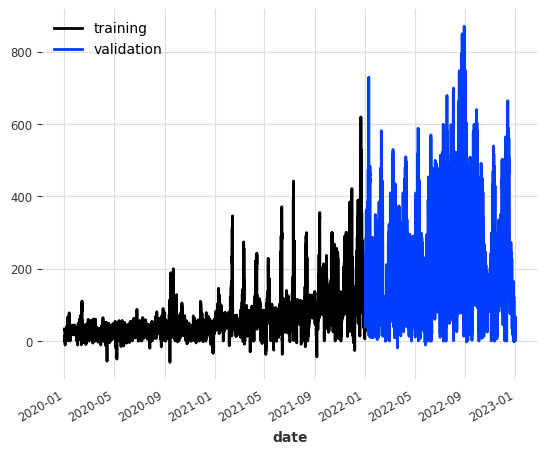

In [23]:
# dart recommendation, but I think we will use random method
train, val = time_series.split_before(pd.Timestamp("01.01.2022 01:00"))
train.plot(label="training")
val.plot(label="validation")

# Darts

In [1]:
# install
pip install darts


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
# import
import darts
from darts import TimeSeries